# Linear Regression using Scikit Learn


In this project we are using Scikit Learn in order to perform Linear Regression using OLS method. We are creating a linear regression model in order to predict the price of 2nd hand car based on its characterstics like Brand, EngineV, Mileage and so on.


## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('car_data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [4]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

Since there are total of 312 unique car models which would mean 312 dummy variables to deal with. We drop the column for now.

In [5]:
data = raw_data.drop('Model',axis =1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In this case, since there are only 172 and 150 missing values, which is less than 5 percent of the total observations, we deal with the missing values by simply removing them.

In [7]:
data_nmv = data.dropna(axis = 0)
data_nmv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the Probability Distribution Function (PDFs)

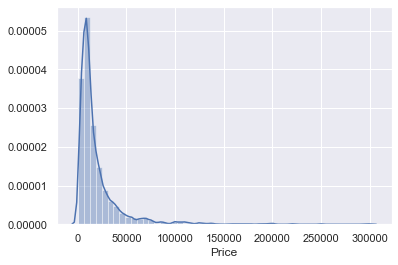

In [8]:
sns.distplot(data_nmv['Price'])

The price variable follows an exponential distribution as well as we can see that the outliers have greatly affected the distribution. The outliers affect the regression dramatically and cause the inflation of coefficients. We can deal with it by simply removing top 1% of the price observations.

In [9]:
top99 = data_nmv['Price'].quantile(0.99)


### Dealing with outliers

In [10]:
data_1 = data_nmv[data_nmv['Price'] < top99]

In [11]:
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


As of now we can see that maximum price is now acceptably closer than previous data frame.

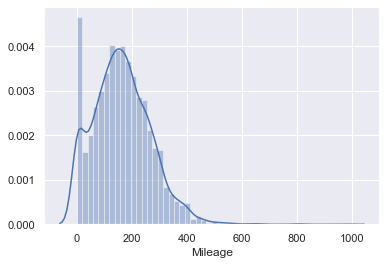

In [12]:
sns.distplot(data_nmv['Mileage'])

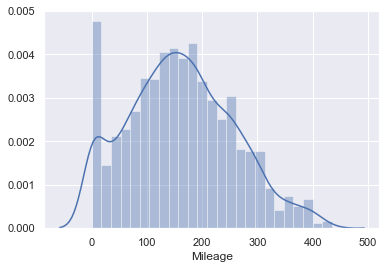

In [13]:
top99 = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']  < top99]
sns.distplot(data_2['Mileage'])

Engine Volume

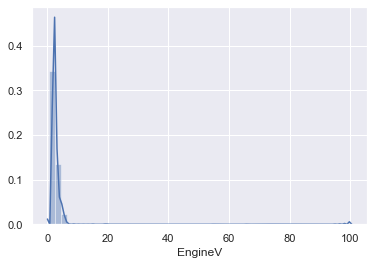

In [14]:
sns.distplot(data_2['EngineV'])

The PDF for Engine Volume is strange. So we look into the values of engine values.

In [15]:
data_2['EngineV'].sort_values()

2512     0.60
188      0.65
2214     1.00
2196     1.00
1923     1.00
        ...  
256     99.99
1264    99.99
3114    99.99
2349    99.99
930     99.99
Name: EngineV, Length: 3944, dtype: float64

The column has many values of 99.99. A quick search shows that Engine lies between 0.6 and 6.5. So we eliminate all the observation with engine values more than 6.5

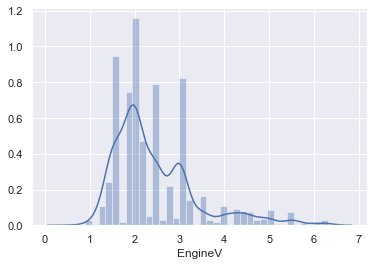

In [16]:
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.distplot(data_3['EngineV'])

Year

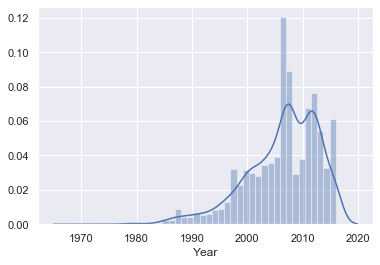

In [17]:
sns.distplot(data_3['Year'])

The PDF shows that there are few vintage cars which act as outliers and can mess up our regression. So we eleminate this kind of outliers by eliminated the early 1% of the year distribution.

In [18]:
data_cleaned = data_3[data_3['Year']  > data_3['Year'].quantile(0.01)]

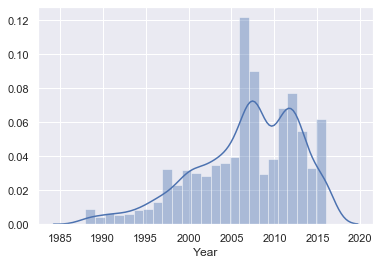

In [19]:
sns.distplot(data_cleaned['Year'])

In [20]:
data_cleaned.reset_index(drop = True,inplace = True)
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

Now that we have gotten rid of all the problematic data now we can start relaxing the OLS assumptions

The first assumption is linearity stating a linear relationship between predictor and predicted values.

Text(0.5, 1.0, 'Year Vs Price')

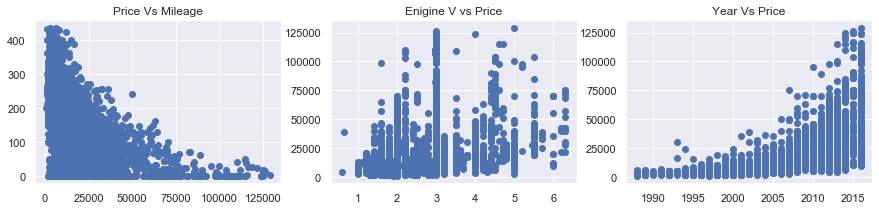

In [21]:
fig,ax = plt.subplots(1,3,figsize=(15,3))
ax[0].scatter(data_cleaned['Price'],data_cleaned['Mileage'])
ax[0].set_title('Price Vs Mileage')
ax[1].scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax[1].set_title('Enigine V vs Price')
ax[2].scatter(data_cleaned['Year'],data_cleaned['Price'])
ax[2].set_title('Year Vs Price')

From the above graphs, it is clear that the relationship between price and predictors is not linear as the price itself follows exponential distribution. One of the fixes for this problem is to transform this relationship. For this case, we are using log transformation.

### Relaxing the assumptions

In [22]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

C:\Users\shres\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0.5, 1.0, 'Year Vs log_price')

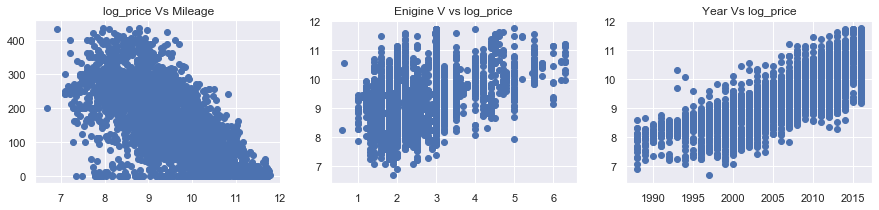

In [23]:
fig,ax = plt.subplots(1,3,figsize=(15,3))
ax[0].scatter(data_cleaned['log_price'],data_cleaned['Mileage'])
ax[0].set_title('log_price Vs Mileage')
ax[1].scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax[1].set_title('Enigine V vs log_price')
ax[2].scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax[2].set_title('Year Vs log_price')

Now we can see linear relationship among the data and log_price fit much better with the the data. Lets drop the original price variable from the data frame as it is not required.

In [24]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### Multicollinearity

In order to check multicollinearity among the predictor variable, variance inflation factor estimates how much larger the square root of standard error is compared to the situation in which the variables are completely uncorrelated. The value starts from 1 and refers no collinearity.

In [25]:
data_cleaned.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
predictors = data_cleaned[['Mileage', 'EngineV','Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif['Features'] = predictors.columns
vif

,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


As seen above we can see that Year is extremely correlated with other variables. So we drop the year feature.

In [27]:
data_multicollinearity_removed = data_cleaned.drop(['Year'],axis = 1)

## Create dummy variables

In [28]:
data_with_dummies = pd.get_dummies(data_multicollinearity_removed,drop_first = True)

In [29]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [38]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [44]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [47]:
data_preprocessed = data_with_dummies[['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]

In [48]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# LINEAR REGRESSION MODEL

# Declare Input and Target Variables

In [49]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop('log_price',axis = 1)

# Scale the inputs

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
input_scaled = scaler.transform(inputs)

### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, target,test_size = 0.2,random_state = 42)

### Create the Regression

In [54]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'y_hat')

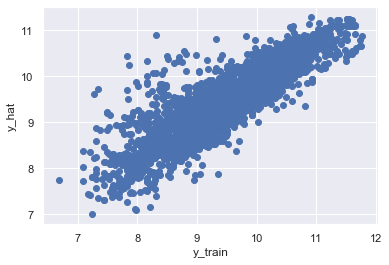

In [61]:
y_hat = reg.predict(x_train)
plt.scatter(y_train,y_hat)
plt.xlabel('y_train')
plt.ylabel('y_hat')


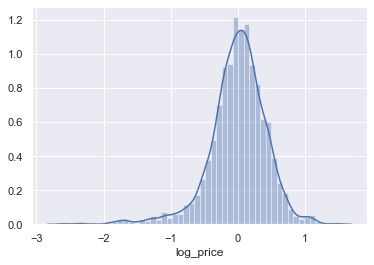

In [63]:
sns.distplot(y_train - y_hat)

As we can see from the plot, it has a much longer tail on the left indicating the model is more likely to make overestimate of target than underestimating it.

In [74]:
reg.score(x_train,y_train)

0.7546487921881218

### Finding Weights and Bias

In [67]:
reg.intercept_

9.421003614148074

In [68]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [73]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


## Testing

In [75]:
y_hat_test = reg.predict(x_test)

Text(0, 0.5, 'y_hat_test')

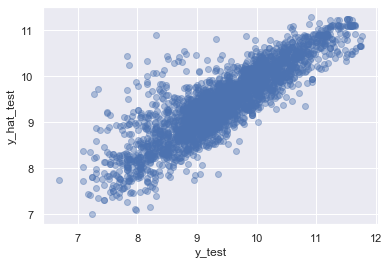

In [78]:
plt.scatter(y_train,y_hat,alpha=0.4)
plt.xlabel('y_test')
plt.ylabel('y_hat_test')

As we can see from the plot, our model is very good at predicting higher prices as the concentration is much higher in the 45 degree line. But it is not good for the lower prices.

In [100]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
pd.options.display.max_rows = 999
df_pf.sort_values(by=['Difference%'],ascending= False)

,Prediction,Target,Residual,Difference%
681,45259.020603,2400.00,-42859.020603,1785.792525
750,30076.594470,3150.00,-26926.594470,854.812523
219,27632.396163,2900.00,-24732.396163,852.841247
280,39469.510133,4800.00,-34669.510133,722.281461
713,13941.933769,2200.00,-11741.933769,533.724262
556,20887.209491,3500.00,-17387.209491,496.777414
260,33893.006837,6500.00,-27393.006837,421.430874
58,11913.906733,2300.00,-9613.906733,417.995945
562,31429.042528,6800.00,-24629.042528,362.191802
747,10572.989808,2300.00,-8272.989808,359.695209


It seems that in most of the extreme cases we are overestimating the values. This error could caused due to features which we did not take into consideration such as car damage or car condition or due to presence of outliers.